Презентация

https://drive.google.com/file/d/115DWMSRq0HEr8HvxGyo3KYuSgFWu8oad/view?usp=sharing

Название проекта: Поиск клиентов с неоптимальным тарифом

Описание проекта: я джуниор-аналитик в буткемпе. Комерческий директор «Нупозвони» — провайдера виртуальный телефонии хочет получить ответы на интересующие его вопросы. В дальнейшем результат пойдет к консультантам, которые будут обзванивать клиентов и предлагать перейти на более выгодный тариф. Необходимо выяснить: Для какого процента пользователей есть целесообразность переводить их на новые тарифы? Как сильно просядем в выручке, если переведем всех? Кого целесообразно переводить? Сколько пользователи сейчас переплачивают?

Описание данных: Датасеты описывают использование услуг «Нупозвони» — провайдера виртуальный телефонии. Его клиенты — колл-центры, которые: распределяют входящие вызовы на операторов, совершают исходящие вызовы силами операторов. Также операторы могут делать внутренние вызовы — вызовы друг между другом внутри сети виртуальной телефонии. Датасет /datasets/telecom_dataset.csv Колонки: user_id — идентификатор клиента; date — дата статистики; direction — направление вызовов: out — исходящий вызов, in — входящий; internal — маркер внутренних и внешних вызовов; operator_id — идентификатор оператора; is_missed_call — маркер пропущенных вызовов; calls_count — количество звонков; call_duration — длительность звонка без учёта времени ожидания; total_call_duration — длительность звонка с учётом времени ожидания. Датасет /datasets/telecom_clients.csv Колонки: user_id — идентификатор клиента; tariff_plan — тарифный план клиента; date_start — дата регистрации клиента в сервисе.

Цели работы:

Поиск аномалий в данных. Соответствуют ли описанию фактические данные.
Найти активных клиентов
Поиск переплачивающих клиентов
Узнать текущую выручку
Определение выручки в разрезе тарифов
Сколько в среднем платит клиент каждого тарифа
Изменение выручки с клиента с течением времени
Поиск клиентов с неоптимальными тарифами
Сколько активных пользователей переплачивают
Найти процент клиентов, кому целесообразен переход на новый тариф
Как изменится выручка, если переведём на более оптимальный тариф (который более дорогой)
Содержание:

Загрузка данных
Предобработка данных
Исследовательский анализ данных
Поиск аномалий
Поиск активных клиентов
Изучение распределения доходов
Проверка гипотез
Общие выводы
Презентация

Содержание: 

1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
- Поиск аномалий
- Поиск активных клиентов
- Изучение распределения доходов
4. Проверка гипотез
5. Общие выводы


## Загрузка и изучение данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
from scipy import stats as st

In [2]:
dataset = pd.read_csv('/datasets/telecom_dataset.csv', parse_dates=['date'])

In [3]:
clients = pd.read_csv('/datasets/telecom_clients.csv', parse_dates=['date_start'])

In [4]:
dataset.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [5]:
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              53902 non-null  int64                                
 1   date                 53902 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            53902 non-null  object                               
 3   internal             53785 non-null  object                               
 4   operator_id          45730 non-null  float64                              
 5   is_missed_call       53902 non-null  bool                                 
 6   calls_count          53902 non-null  int64                                
 7   call_duration        53902 non-null  int64                                
 8   total_call_duration  53902 non-null  int64                                
dtypes: bool

In [7]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


Мы видим в датасете "dataset" 53902 записи и в "clients" их число равно 732. В первом имеются пропуски в столбцах internal, operator_id. Так же столбец operator_id имеет не корректный тип данных.  

## Предобработка данных

###  Обработка пропусков

Пропуски в столбце operator_id

In [8]:
dataset['operator_id'].isna().sum()

8172

Кол-во пропусков значительно. Но у нас в рамках исследования нет задачи решать вопросы связанные с операторами. Принимаю решение оставить эти пропуски как есть. При необходимости, можно создать отдельный датасет, куда войдут записи с отсутствующими операторами и передать рук-лю проекта или лицу ответственному за сбор данных.

Пропуски в столбце internal

In [9]:
dataset['internal'].isna().sum()

117

internal - представляет собой маркер внутренних и внешних вызовов. Кол-во пропусков 117, что очень мало от общего объёма данных. 
В виду отсутствия возможности эти данные получить, и необходимости этих значений для дальнейших расчётов, принимаю решение удалить эти данные.

In [10]:
dataset = dataset.dropna(subset=['internal'])

Проверяем, удалились ли строки 

In [11]:
dataset['internal'].isna().sum()

0

### Приведение к соответствующим типам данные

Приведем к формату datetime столбец date_start, в data так же изменим тип и уберем указание временной зоны.

In [12]:
dataset['date'] = pd.to_datetime(dataset['date']).dt.tz_localize(None)

In [13]:
dataset.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04,in,False,NaN,True,2,0,4
1,166377,2019-08-05,out,True,880022.0,True,3,0,5
2,166377,2019-08-05,out,True,880020.0,True,1,0,1
3,166377,2019-08-05,out,True,880020.0,False,1,10,18
4,166377,2019-08-05,out,False,880022.0,True,3,0,25


Приведём значения столбца operator_id к формату Int.

In [14]:
dataset['operator_id'] = dataset['operator_id'].astype('Int64')

Убедимся, что все изменилось.

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53785 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53785 non-null  int64         
 1   date                 53785 non-null  datetime64[ns]
 2   direction            53785 non-null  object        
 3   internal             53785 non-null  object        
 4   operator_id          45670 non-null  Int64         
 5   is_missed_call       53785 non-null  bool          
 6   calls_count          53785 non-null  int64         
 7   call_duration        53785 non-null  int64         
 8   total_call_duration  53785 non-null  int64         
dtypes: Int64(1), bool(1), datetime64[ns](1), int64(4), object(2)
memory usage: 3.8+ MB


In [16]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


### Обработка дубликатов

Проверим наличие явных дубликатов

In [17]:
dataset.duplicated().sum()

4893

In [18]:
dataset = dataset.drop_duplicates().reset_index(drop=True)

Убедились, что всё было нормально удалено и заодно проверили общий вид датасета.

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48892 entries, 0 to 48891
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              48892 non-null  int64         
 1   date                 48892 non-null  datetime64[ns]
 2   direction            48892 non-null  object        
 3   internal             48892 non-null  object        
 4   operator_id          41491 non-null  Int64         
 5   is_missed_call       48892 non-null  bool          
 6   calls_count          48892 non-null  int64         
 7   call_duration        48892 non-null  int64         
 8   total_call_duration  48892 non-null  int64         
dtypes: Int64(1), bool(1), datetime64[ns](1), int64(4), object(2)
memory usage: 3.1+ MB


In [20]:
dataset.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04,in,False,<NA>,True,2,0,4
1,166377,2019-08-05,out,True,880022,True,3,0,5
2,166377,2019-08-05,out,True,880020,True,1,0,1
3,166377,2019-08-05,out,True,880020,False,1,10,18
4,166377,2019-08-05,out,False,880022,True,3,0,25


В процессе предобрапотки данных были удалены 117 пропусков в колонке internal. Пропуски в operator_id были оставлены без изменения. Был изменен на актуальный формат у столбцов operator_id, date_start и date. В последнем было убрало указание временной зоны. 
Так же были удалены явные дубликаты в числе 4893 штук. На данный момент датасет имеет 48892 строк.

## Исследовательский анализ данных

### Поиск аномалий

Посмотрим, соответствуют ли данные в dataset в столбцах direction, internal, is_missed_call заявленным.

In [21]:
dataset['direction'].value_counts()

out    28997
in     19895
Name: direction, dtype: int64

In [22]:
dataset['internal'].value_counts()

False    43239
True      5653
Name: internal, dtype: int64

In [23]:
dataset['is_missed_call'].value_counts()

False    27495
True     21397
Name: is_missed_call, dtype: int64

Тут ничего лишнего не видем. Звонков исходящих, примерно на треть больше, чем входящих. В internal мы наблюдаем 5653 внутренних  и 43239 внешних. В is_missed_call пропущенных вызовов много, часто операторы не дозваниваются. 

Рассмотрим данные в calls_count, call_duration и total_call_duration

In [24]:
dataset['calls_count'].describe()

count    48892.000000
mean        16.495214
std         63.671633
min          1.000000
25%          1.000000
50%          4.000000
75%         12.000000
max       4817.000000
Name: calls_count, dtype: float64

In [25]:
dataset['call_duration'].describe()

count     48892.000000
mean        868.088788
std        3779.549967
min           0.000000
25%           0.000000
50%          37.000000
75%         573.000000
max      144395.000000
Name: call_duration, dtype: float64

In [26]:
dataset['total_call_duration'].describe()

count     48892.000000
mean       1158.976458
std        4456.180933
min           0.000000
25%          46.000000
50%         210.000000
75%         902.000000
max      166155.000000
Name: total_call_duration, dtype: float64

В данных видны аномалии, что требует более подробного рассмотрения. 

Взглянем на ТОП данных по столбцам, которые вызвали вопросы.

In [27]:
dataset.sort_values('calls_count', ascending=False).head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
36964,167827,2019-11-11,out,False,929428,True,4817,0,5529
36911,167827,2019-10-31,out,False,929428,True,2614,0,45312
33647,167626,2019-10-07,in,False,<NA>,True,2168,0,2361
33675,167626,2019-10-08,in,False,<NA>,True,1917,0,2044
34086,167626,2019-10-15,in,False,<NA>,True,1914,0,2063


In [28]:
dataset.sort_values('call_duration', ascending=False).head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
6312,166582,2019-09-25,out,False,885876,False,1230,144395,166155
6316,166582,2019-09-26,out,False,885876,False,843,132206,146903
6210,166582,2019-09-12,out,False,885876,False,696,125286,138643
6260,166582,2019-09-18,out,False,885876,False,1013,121664,140050
6186,166582,2019-09-09,out,False,885876,False,1138,121093,141930


In [29]:
dataset.sort_values('total_call_duration', ascending=False).head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
6312,166582,2019-09-25,out,False,885876,False,1230,144395,166155
6316,166582,2019-09-26,out,False,885876,False,843,132206,146903
6186,166582,2019-09-09,out,False,885876,False,1138,121093,141930
6260,166582,2019-09-18,out,False,885876,False,1013,121664,140050
6210,166582,2019-09-12,out,False,885876,False,696,125286,138643


<AxesSubplot:>

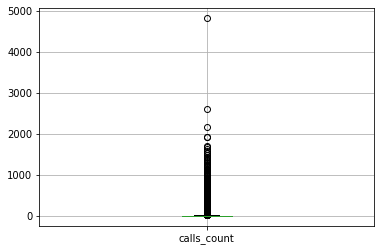

In [30]:
dataset.boxplot(column='calls_count')


<AxesSubplot:>

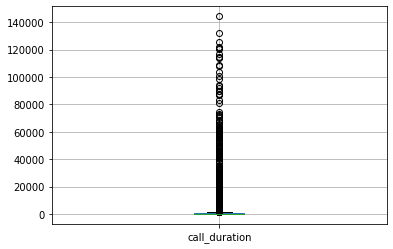

In [31]:
dataset.boxplot(column='call_duration')

<AxesSubplot:>

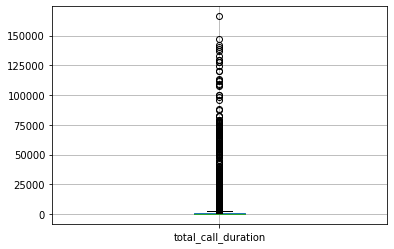

In [32]:
dataset.boxplot(column='total_call_duration')


Так как можно предположить, что единица измерения в датасете в столбцах "call_duration" и "total_call_duration" секунды, то для дальнейшего анализа нам нужно будет группировать данные для каждого клиента и оператора суммарное время разговора и количество звонков за каждую дату. Так же что бы лучше понять работу операторов, переведём секунды звонков в часы (так как чаще всего операторы работают по сменно и они в свою очередь измеряются часами). Переведем в часы по колонке "total_call_duration". Это делается для того, что бы понять, сколько часов каждый оператор общался в день, так как возникают подозрения из-за количества звонков и продолжительности разговоров.

In [33]:
# Агрегируем для каждого клиента и оператора суммарное время разговора и количество звонков за каждую дату
anomalies = dataset.groupby(['user_id', 'date', 'operator_id'], as_index=False)\
    .agg({'calls_count':'sum', 'total_call_duration':'sum'})

Взглянем на получившиеся данные

In [34]:
anomalies.head()

,user_id,date,operator_id,calls_count,total_call_duration
0,166377,2019-08-05,880020,12,98
1,166377,2019-08-05,880022,6,30
2,166377,2019-08-06,880020,10,889
3,166377,2019-08-06,881278,5,34
4,166377,2019-08-07,880020,2,240


Найдём общее время разговора за день и переведём в часы

In [35]:
anomalies['hour_call_duration'] = anomalies['total_call_duration'] / 3600

Взглянем на получившуюся таблицу

In [36]:
anomalies.head()

,user_id,date,operator_id,calls_count,total_call_duration,hour_call_duration
0,166377,2019-08-05,880020,12,98,0.027222
1,166377,2019-08-05,880022,6,30,0.008333
2,166377,2019-08-06,880020,10,889,0.246944
3,166377,2019-08-06,881278,5,34,0.009444
4,166377,2019-08-07,880020,2,240,0.066667


Построим обычный боксплот, что бы лучше представлять данные и гистограмму

<AxesSubplot:>

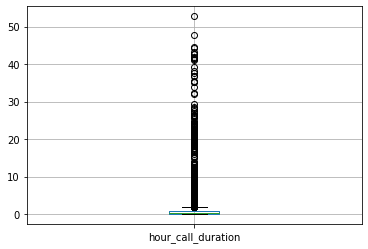

In [37]:
anomalies.boxplot(column='hour_call_duration')

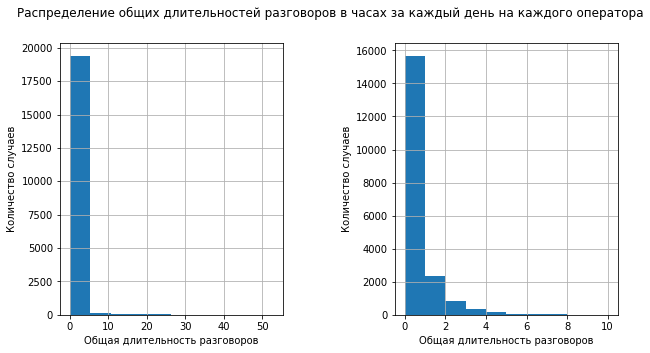

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'hspace': 0.5})
fig.suptitle('Распределение общих длительностей разговоров в часах за каждый день на каждого оператора')
plt.subplots_adjust(wspace=0.5) 

anomalies['hour_call_duration'].plot(kind='hist', grid=True, ax=axes[0])
axes[0].set_xlabel('Общая длительность разговоров')
axes[0].set_ylabel('Количество случаев')

anomalies['hour_call_duration'].plot(kind='hist', grid=True, range=(0, 10), ax=axes[1])
axes[1].set_xlabel('Общая длительность разговоров')
axes[1].set_ylabel('Количество случаев')

plt.show()

Присутствуют разговоры чуть более 50 часов в сутки, что точно не нормально. Есть некоторое кол-во разговоров польше 20 часов в сутки. Учитывая то, что время взято звонков с учётом ожиданий, мы имеем дело или с ошибками агрегации, или под одним id оператора работают фактически несколько человек в кол центре. Так как в данном исследование не предполагается изучать более детально время звонков в разрезе операторов, то время звонков ограничу разумными 8 часами смены(хотя скорей всего чистое время звонков при 8 часовой смене в кол центрах должно быть меньше этого времени). 

Найдём таких операторов, у кого встречается аномальное время звонков. Получим и переменную, в случае которой будет содержатся подобная информация. Возможно, для внутреннней проверки или дальнейшего разбирательства. Какое кол-во от общего объема данных будут составлять такие аномалии.

In [39]:
# датафрейм с аномальными данными у операторов
anomalies_days = anomalies.query('hour_call_duration > 8')

In [40]:
anomalies_days.shape[0]

161

Какой процент аномалии составляют от общих данных

In [41]:
total_rows = len(dataset)
anomalies_rows = len(anomalies_days)
percentage_anomalies = round((anomalies_rows / total_rows) * 100, 2)

print(f"Процент данных с аномалиями от общего числа данных: {percentage_anomalies}%")

Процент данных с аномалиями от общего числа данных: 0.33%


Процент таких аномальных данных очень мал, по этому мы можем его удалить из анализируемого датасета.

In [42]:
# очищенный от аномальных случаев датафрейм
clean_dataset = dataset.query('user_id not in @anomalies_days.user_id').reset_index(drop=True)

Взглянем ещё раз на данные 

In [43]:
clean_dataset.sort_values('calls_count', ascending=False).head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
32859,167626,2019-10-07,in,False,<NA>,True,2168,0,2361
32887,167626,2019-10-08,in,False,<NA>,True,1917,0,2044
33298,167626,2019-10-15,in,False,<NA>,True,1914,0,2063
33065,167626,2019-10-11,in,False,<NA>,True,1705,0,2455
45055,168252,2019-11-25,in,False,<NA>,True,1679,0,42251


In [44]:
clean_dataset.sort_values('call_duration', ascending=False).head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
44970,168252,2019-11-22,in,False,<NA>,False,52,26175,26347
45156,168252,2019-11-28,in,False,<NA>,False,45,23765,23897
45108,168252,2019-11-27,in,False,<NA>,False,52,23706,23894
45031,168252,2019-11-25,in,False,<NA>,False,49,23658,23854
44905,168252,2019-11-21,in,False,<NA>,False,37,21446,21563


Можно конечно смотреть более внимательно количество звонков в день у одного оператора. Но в рамках данного проекта это пожалуй не входит в нашу первоочередную задачу. При необходимости, так же как мы отобрали список операторов, у кого время разговоров ненормально длинное, можно найти и операторов, у кого количество звонков не разумно большое. Сейчас сложно определить эту границу разумности в числе звонков в ден, по этому данную аномалию оставим без изменения. 

### Поиск активных клиентов

Посмотрим на интервал времени, за который мы имеем данные

In [45]:
clean_dataset['date'].min()

Timestamp('2019-08-02 00:00:00')

In [46]:
clean_dataset['date'].max()

Timestamp('2019-11-28 00:00:00')

В датасете представлены данные с начала августа по конец ноября 2019 года. Данные за ноябрь неполные - за 3 дня нет данных. Но данные за ноябрь хоть и не полные, но дают нам впринципе много информации и целиком отказываться от этого месяца при анализе данных считаю не целесообразным. На основание данных за этот хоть и не полный месяц, мы отберём активных пользователей. 

Для отбора активных пользователей и дальнейшего анализа, создадим поле с номером месяца.

In [47]:
clean_dataset['month'] = clean_dataset['date'].dt.month

Проверили, что всё создалось и сохранилось

In [48]:
clean_dataset.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,month
0,166377,2019-08-04,in,False,<NA>,True,2,0,4,8
1,166377,2019-08-05,out,True,880022,True,3,0,5,8
2,166377,2019-08-05,out,True,880020,True,1,0,1,8
3,166377,2019-08-05,out,True,880020,False,1,10,18,8
4,166377,2019-08-05,out,False,880022,True,3,0,25,8


Теперь собственно находим активных пользователей, которые были в ноябре (11 месяц)

In [49]:
active_users_filter = clean_dataset[clean_dataset['month'] == 11]['user_id'].unique()

Посмотрим, сколько активных кол центров было в ноябре

In [50]:
active_users_filter.shape[0]

257

Отберём всех активных пользователей за весь период

In [51]:
active_users = clean_dataset.query('user_id in @active_users_filter').reset_index(drop=True)

Проверим результат

In [52]:
active_users.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,month
0,166377,2019-08-04,in,False,<NA>,True,2,0,4,8
1,166377,2019-08-05,out,True,880022,True,3,0,5,8
2,166377,2019-08-05,out,True,880020,True,1,0,1,8
3,166377,2019-08-05,out,True,880020,False,1,10,18,8
4,166377,2019-08-05,out,False,880022,True,3,0,25,8


### Изучение распределения доходов от активных пользователей

####  Поиск переплачивающих клиентов

Секунды переведём в минуты путём создания нового столбца "call minutes". Округляем в большую сторону, тк при рассчёте тарифов, секунды разговора если тарификация по минутная приравниваются к целой минуте. Эти данные должны иметь целочисленный вид и соответственно тип 

In [53]:
# создаём новый столбец, содержащий минуты с округлением в большую сторону.
active_users["call_minutes"] = np.ceil(active_users["total_call_duration"] / 60).astype('int')

Проверим результат

In [54]:
active_users.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,month,call_minutes
0,166377,2019-08-04,in,False,<NA>,True,2,0,4,8,1
1,166377,2019-08-05,out,True,880022,True,3,0,5,8,1
2,166377,2019-08-05,out,True,880020,True,1,0,1,8,1
3,166377,2019-08-05,out,True,880020,False,1,10,18,8,1
4,166377,2019-08-05,out,False,880022,True,3,0,25,8,1


In [55]:
groupby = active_users.groupby(['user_id', 'month','direction', 'internal']).\
agg({'call_minutes':'sum'}).reset_index()

In [56]:
groupby.head()

,user_id,month,direction,internal,call_minutes
0,166377,8,in,False,43
1,166377,8,out,False,1337
2,166377,8,out,True,8
3,166377,9,in,False,48
4,166377,9,out,False,1818


In [57]:
active_users_tariffs_groupby = groupby.merge(clients[['user_id', 'tariff_plan']], 
                                                          how='left', 
                                                          on='user_id')

In [58]:
active_users_tariffs_groupby.head()

,user_id,month,direction,internal,call_minutes,tariff_plan
0,166377,8,in,False,43,B
1,166377,8,out,False,1337,B
2,166377,8,out,True,8,B
3,166377,9,in,False,48,B
4,166377,9,out,False,1818,B


In [59]:
def add_tariff_columns(df):
    '''
    Функция создаёт в датафрейме столбцы и заполняет их в соответствие со значением в колонке 'tariff_plan'
    
    '''
        
    price_costs = {'A': 4000, 'B': 2000, 'C': 1000}
    free_minutes_costs = {'A': 2000, 'B': 500, 'C': 0}
    over_limit_costs = {'A': 0.1, 'B': 0.15, 'C': 0.30}
    non_internal_costs = {'A': 0.3, 'B': 0.5, 'C': 0.7}
    
    active_users_tariffs_groupby['price'] = active_users_tariffs_groupby['tariff_plan'].apply(lambda x: price_costs[x])
    active_users_tariffs_groupby['free_minutes'] = active_users_tariffs_groupby['tariff_plan'].apply(lambda x: free_minutes_costs[x])
    active_users_tariffs_groupby['over_limit'] = active_users_tariffs_groupby['tariff_plan'].apply(lambda x: over_limit_costs[x])
    active_users_tariffs_groupby['non_internal'] = active_users_tariffs_groupby['tariff_plan'].apply(lambda x: non_internal_costs[x])
    
    
    return df
active_users_groupby_costs = add_tariff_columns(active_users_tariffs_groupby)

In [60]:
active_users_groupby_costs.head()

,user_id,month,direction,internal,call_minutes,tariff_plan,price,free_minutes,over_limit,non_internal
0,166377,8,in,False,43,B,2000,500,0.15,0.5
1,166377,8,out,False,1337,B,2000,500,0.15,0.5
2,166377,8,out,True,8,B,2000,500,0.15,0.5
3,166377,9,in,False,48,B,2000,500,0.15,0.5
4,166377,9,out,False,1818,B,2000,500,0.15,0.5


In [61]:
# звонки исходящие не внутренние
outgoing_non_internal = ((active_users_groupby_costs['internal']==False) & 
                              (active_users_groupby_costs['direction']=='out'))

In [62]:
active_users_groupby_costs.loc[outgoing_non_internal, 'income_no_int'] = (
    active_users_groupby_costs['call_minutes'] * active_users_groupby_costs['non_internal']
)

In [63]:
# заменяем пропуски нулями
active_users_groupby_costs['income_no_int'] = active_users_groupby_costs['income_no_int'].fillna(0)

In [64]:
active_users_groupby_costs.head()

,user_id,month,direction,internal,call_minutes,tariff_plan,price,free_minutes,over_limit,non_internal,income_no_int
0,166377,8,in,False,43,B,2000,500,0.15,0.5,0.0
1,166377,8,out,False,1337,B,2000,500,0.15,0.5,668.5
2,166377,8,out,True,8,B,2000,500,0.15,0.5,0.0
3,166377,9,in,False,48,B,2000,500,0.15,0.5,0.0
4,166377,9,out,False,1818,B,2000,500,0.15,0.5,909.0


In [65]:
# звонки исходящие внутренние
find_internal_over_limit = ((active_users_groupby_costs['direction']=='out') & 
                            (active_users_groupby_costs['internal']==True) & 
                            (active_users_groupby_costs['call_minutes']>active_users_groupby_costs['free_minutes']))   

In [66]:
active_users_groupby_costs.loc[find_internal_over_limit, 'income_int'] = (
    (active_users_groupby_costs['call_minutes'] - active_users_groupby_costs['free_minutes']) *\
    active_users_groupby_costs['over_limit'])

In [67]:
# Сохраним номера кол центров, которые платят сверх тарифа.
filtered_df = active_users_groupby_costs.query("direction == 'out' and internal == True and call_minutes > free_minutes")
user_ids_list = filtered_df['user_id'].tolist()

In [68]:
# заменяем пропуски нулями
active_users_groupby_costs['income_int'] = active_users_groupby_costs['income_int'].fillna(0)

In [69]:
active_users_groupby_costs.head()

,user_id,month,direction,internal,call_minutes,tariff_plan,price,free_minutes,over_limit,non_internal,income_no_int,income_int
0,166377,8,in,False,43,B,2000,500,0.15,0.5,0.0,0.0
1,166377,8,out,False,1337,B,2000,500,0.15,0.5,668.5,0.0
2,166377,8,out,True,8,B,2000,500,0.15,0.5,0.0,0.0
3,166377,9,in,False,48,B,2000,500,0.15,0.5,0.0,0.0
4,166377,9,out,False,1818,B,2000,500,0.15,0.5,909.0,0.0


In [70]:
# общий доход от минут сверх лимита
active_users_groupby_costs['total_min_income'] = (
    active_users_groupby_costs['income_no_int'] + active_users_groupby_costs['income_int']
)

In [71]:
active_users_groupby_costs.head()

,user_id,month,direction,internal,call_minutes,tariff_plan,price,free_minutes,over_limit,non_internal,income_no_int,income_int,total_min_income
0,166377,8,in,False,43,B,2000,500,0.15,0.5,0.0,0.0,0.0
1,166377,8,out,False,1337,B,2000,500,0.15,0.5,668.5,0.0,668.5
2,166377,8,out,True,8,B,2000,500,0.15,0.5,0.0,0.0,0.0
3,166377,9,in,False,48,B,2000,500,0.15,0.5,0.0,0.0,0.0
4,166377,9,out,False,1818,B,2000,500,0.15,0.5,909.0,0.0,909.0


In [72]:
filtered_users_1 = active_users_groupby_costs.loc[(active_users_groupby_costs['month'] == 11) & 
                                               (active_users_groupby_costs['direction'] == 'out') & 
                                               (active_users_groupby_costs['internal'] == True) & 
                                               (active_users_groupby_costs['call_minutes'] > active_users_groupby_costs['free_minutes'])]

unique_users_count = filtered_users_1['user_id'].nunique()
print(unique_users_count)


33


Всего 33 активных клиента, у кого имеется переплата по исходящим внутренним звонкам. 

In [73]:
active_users_filter.shape[0]

257

Распределение пользователей имеющих переплату по месяцам

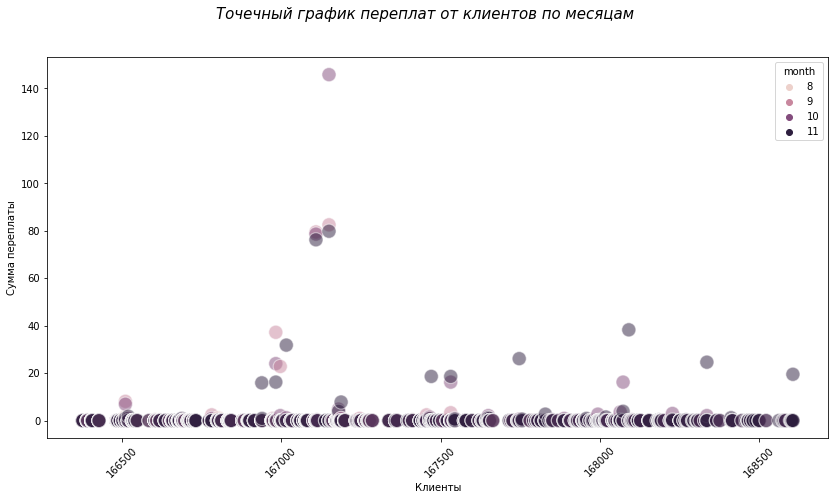

In [74]:
fig, ax = plt.subplots(figsize=(14,7))
fig.suptitle('Точечный график переплат от клиентов по месяцам',
             fontsize=15, 
             style="oblique")

ax = sns.scatterplot(x="user_id",
                     y="income_int", 
                     data=active_users_groupby_costs,
                     hue='month',
                     alpha=.5,
                     s=200)

plt.xticks(rotation=45)

ax.set_ylabel('Сумма переплаты')
ax.set_xlabel('Клиенты');

Переплаты мы можем выделить только на тарифе исходящий-внутренний. Судя по графику переплаты не большие, максимум 140. При этом в ноябре особых переплат не видно.

#### Посчитать текущую выручку

Посчитать затраты за операторов для кол центров. 

In [75]:
# Выполним группировку по операторам и месяцам, найдём кол-во уникальных операторов в месяц для кол центров
operator_unique = active_users.groupby(['user_id', 'month'])\
    .agg({'operator_id':'nunique'})\
    .rename(columns={'operator_id':'number_of_operators'})\
    .reset_index()

In [76]:
operator_unique.head()

,user_id,month,number_of_operators
0,166377,8,5
1,166377,9,4
2,166377,10,5
3,166377,11,4
4,166391,8,2


In [77]:
# Присоединим тариф
operator_unique_tariffs = operator_unique.merge(clients[['user_id', 'tariff_plan']], 
                                                          how='left', 
                                                          on='user_id')

In [78]:
operator_unique_tariffs.head()

,user_id,month,number_of_operators,tariff_plan
0,166377,8,5,B
1,166377,9,4,B
2,166377,10,5,B
3,166377,11,4,B
4,166391,8,2,C


In [79]:
def assign_price_operator(row):
    
    '''
    Функция создаёт в датафрейме столбц, в который значения записываются согласно категориям из 'tariff_plan'
    
    '''
    if row['tariff_plan'] == 'A':
        return 50
    elif row['tariff_plan'] == 'B':
        return 150
    elif row['tariff_plan'] == 'C':
        return 300

operator_unique_tariffs['price_operator'] = operator_unique_tariffs.apply(assign_price_operator, axis=1)

In [80]:
operator_unique_tariffs.head()

,user_id,month,number_of_operators,tariff_plan,price_operator
0,166377,8,5,B,150
1,166377,9,4,B,150
2,166377,10,5,B,150
3,166377,11,4,B,150
4,166391,8,2,C,300


Подсчитаем доходы от тарифа на операторов для кол центров

In [81]:
operator_unique_tariffs ['income_oper'] = (
    operator_unique_tariffs ['number_of_operators'] * operator_unique_tariffs ['price_operator']
)

In [82]:
operator_unique_tariffs.head()

,user_id,month,number_of_operators,tariff_plan,price_operator,income_oper
0,166377,8,5,B,150,750
1,166377,9,4,B,150,600
2,166377,10,5,B,150,750
3,166377,11,4,B,150,600
4,166391,8,2,C,300,600


Найдём доход от всех операторов для кол центров

In [83]:
users_groupby_preparation = active_users_groupby_costs.groupby(['user_id', 'month', 'tariff_plan', 'price'])\
    .agg({'total_min_income':'sum'})\
    .reset_index()

In [84]:
users_groupby_preparation.head()

,user_id,month,tariff_plan,price,total_min_income
0,166377,8,B,2000,668.5
1,166377,9,B,2000,909.0
2,166377,10,B,2000,852.0
3,166377,11,B,2000,816.5
4,166391,8,C,1000,0.3


In [85]:
user_month_tariff = (
    pd.merge(users_groupby_preparation, operator_unique_tariffs, on=['user_id', 'month', 'tariff_plan'])
)

In [86]:
user_month_tariff.head()

,user_id,month,tariff_plan,price,total_min_income,number_of_operators,price_operator,income_oper
0,166377,8,B,2000,668.5,5,150,750
1,166377,9,B,2000,909.0,4,150,600
2,166377,10,B,2000,852.0,5,150,750
3,166377,11,B,2000,816.5,4,150,600
4,166391,8,C,1000,0.3,2,300,600


Удалим не нужные колонки

In [87]:
user_month_tariff.drop(['number_of_operators' , 'price_operator'], axis=1, inplace=True)

In [88]:
user_month_tariff.head()

,user_id,month,tariff_plan,price,total_min_income,income_oper
0,166377,8,B,2000,668.5,750
1,166377,9,B,2000,909.0,600
2,166377,10,B,2000,852.0,750
3,166377,11,B,2000,816.5,600
4,166391,8,C,1000,0.3,600


In [89]:
user_month_tariff['total_all_income'] = user_month_tariff['price'] + user_month_tariff['total_min_income']+\
                                        user_month_tariff['income_oper']

In [90]:
user_month_tariff.head()

,user_id,month,tariff_plan,price,total_min_income,income_oper,total_all_income
0,166377,8,B,2000,668.5,750,3418.5
1,166377,9,B,2000,909.0,600,3509.0
2,166377,10,B,2000,852.0,750,3602.0
3,166377,11,B,2000,816.5,600,3416.5
4,166391,8,C,1000,0.3,600,1600.3


Текущую выручку можно узнать сложив все расходы клиентов за последний месяц. Так же для общей картины узнаем общую выручку за все известные месяца

In [91]:
monthly_income = user_month_tariff.groupby('month')['total_all_income'].sum()

In [92]:
monthly_income

month
8     153421.30
9     333789.00
10    561086.70
11    646673.75
Name: total_all_income, dtype: float64

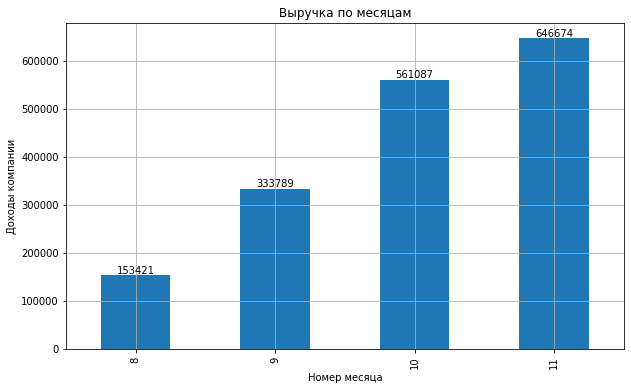

In [93]:
plt.figure(figsize=(10, 6))
monthly_income.plot(kind='bar', grid=True)
plt.xlabel('Номер месяца')
plt.ylabel('Доходы компании')
plt.title('Выручка по месяцам')
# Добавление подписей к каждому столбцу

for i, v in enumerate(monthly_income):
    plt.text(i, v + 5, str(round(v)), ha='center', va='bottom')
plt.show()

1. Текущая выручка составляет 646674. Минимальная была в августе - 153421.
2. Мы наблюдаем, что выручка ростёт от месяца к месяцу.

#### Определение выручки в разрезе тарифов

In [94]:
data_mtp = user_month_tariff.groupby(['month', 'tariff_plan'], \
                        as_index = False)[['total_all_income']].sum()

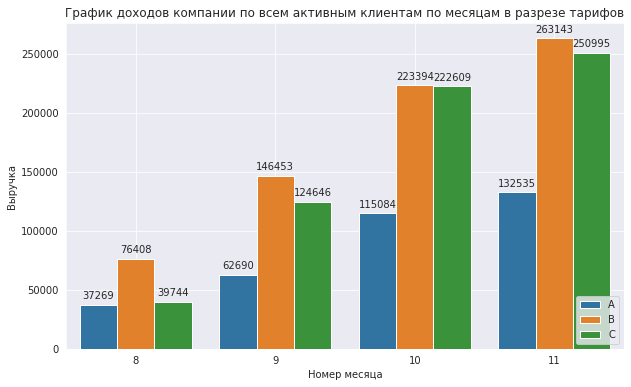

In [95]:
sns.set_style('dark')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='month', y='total_all_income', data=data_mtp, hue='tariff_plan')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('График доходов компании по всем активным клиентам по месяцам в разрезе тарифов')
plt.xlabel('Номер месяца')
plt.ylabel('Выручка')
plt.legend(loc='lower right', fontsize=10)
plt.grid()
plt.show()

1. Выручка ростёт на всех тарифах
2. В августе выручка по тарифам A и C были примерно равны и отставала от тарифа B. К концу же наблюдаемого периода выручка тарифа C практически сравнялась с выручкой от B, и они опережают выручку от тарифа A.

#### Сколько в среднем платит клиент каждого тарифа

Сгруппируем данные по тарифу и найдём средее число оплат клиентов

In [96]:
average_income_by_tariff = user_month_tariff.groupby('tariff_plan')['total_all_income'].mean()

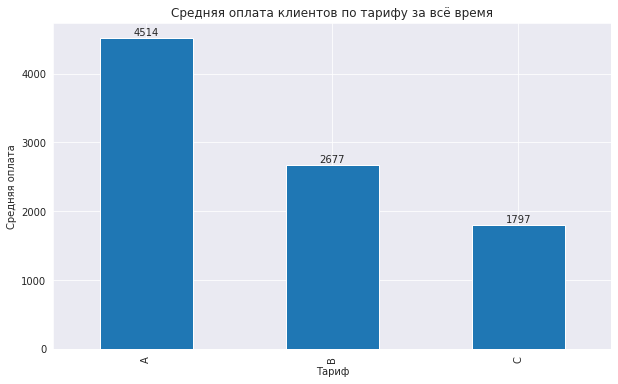

In [97]:
plt.figure(figsize=(10, 6))
average_income_by_tariff.plot(kind='bar', grid=True)
plt.xlabel('Тариф')
plt.ylabel('Средняя оплата')
plt.title('Средняя оплата клиентов по тарифу за всё время')
# Добавление подписей к каждому столбцу

for i, v in enumerate(average_income_by_tariff):
    plt.text(i, v + 5, str(round(v)), ha='center', va='bottom')
plt.show()

В среднем, клиент тарифа A платит почти в два раза больше, чем на тарифе B. Те, кто на тарифе C платят в среднем меньше всего. 

#### Изменение выручки с клиента с течением времени

Сгруппируем данные по тарифу и месяцу, найдём средее число оплат клиентов

In [98]:
ave_income_by_tariff_month = user_month_tariff.groupby(['month', 'tariff_plan'], \
                        as_index = False)[['total_all_income']].mean()

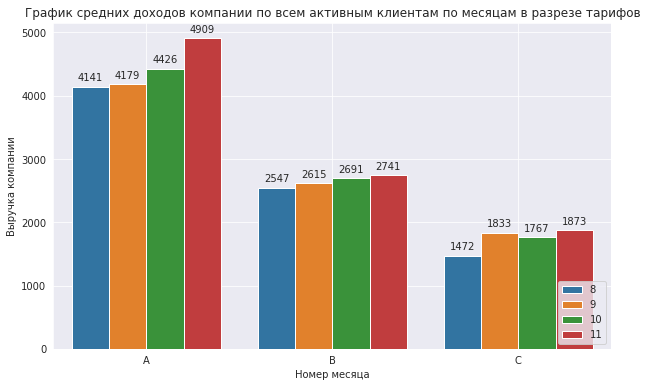

In [99]:
sns.set_style('dark')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='tariff_plan', y='total_all_income', data=ave_income_by_tariff_month, hue='month')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('График средних доходов компании по всем активным клиентам по месяцам в разрезе тарифов')
plt.xlabel('Номер месяца')
plt.ylabel('Выручка компании')
plt.legend(loc='lower right', fontsize=10)
plt.grid()
plt.show()

Можно сказать, что выручка с течением времени растёт на всех тарифах.
Выручка на тарифе А растёт немного быстрее.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Как раз то, что хотелось, спасибо!

#### Поиск клиентов с неоптимальными тарифами

In [100]:
active_users_tariffs_groupby.head()

,user_id,month,direction,internal,call_minutes,tariff_plan,price,free_minutes,over_limit,non_internal,income_no_int,income_int,total_min_income
0,166377,8,in,False,43,B,2000,500,0.15,0.5,0.0,0.0,0.0
1,166377,8,out,False,1337,B,2000,500,0.15,0.5,668.5,0.0,668.5
2,166377,8,out,True,8,B,2000,500,0.15,0.5,0.0,0.0,0.0
3,166377,9,in,False,48,B,2000,500,0.15,0.5,0.0,0.0,0.0
4,166377,9,out,False,1818,B,2000,500,0.15,0.5,909.0,0.0,909.0


In [101]:
def calculate_tariffs(filtered_df):
    
    '''
    Функция создаёт в датафрейме 3 новых столбца, куда записываются возможные доходы, если бы кол центр был на
    тарифе А, В или с соответственно'
    
    '''
        
    tarif_A = { 'free_minutes_costs': 2000, 'over_limit': 0.1, 'non_internal': 0.3}
    tarif_B = {'free_minutes_costs': 500, 'over_limit': 0.15, 'non_internal': 0.5}
    tarif_C = {'free_minutes_costs': 0, 'over_limit': 0.30, 'non_internal': 0.7}

    
    def calculate_cost(row, tariff):
        if row['direction'] == 'out' and not row['internal']:
            return row['call_minutes'] * tariff['non_internal']
        elif row['direction'] == 'out' and row['internal'] and row['call_minutes'] > tariff['free_minutes_costs']:
            return (row['call_minutes'] - tariff['free_minutes_costs']) * tariff['over_limit']
        elif row['direction'] == 'in':
            return 0
        else:
            return None        
            
            

    filtered_df['tarif_A'] = filtered_df.apply(lambda row: calculate_cost(row, tarif_A), axis=1)
    filtered_df['tarif_B'] = filtered_df.apply(lambda row: calculate_cost(row, tarif_B), axis=1)
    filtered_df['tarif_C'] = filtered_df.apply(lambda row: calculate_cost(row, tarif_C), axis=1)

    return filtered_df
calculate_tariffs_minutes = calculate_tariffs(active_users_tariffs_groupby)

In [102]:
calculate_tariffs_minutes = calculate_tariffs_minutes.fillna(0)

In [103]:
calculate_tariffs_minutes.head()

,user_id,month,direction,internal,call_minutes,tariff_plan,price,free_minutes,over_limit,non_internal,income_no_int,income_int,total_min_income,tarif_A,tarif_B,tarif_C
0,166377,8,in,False,43,B,2000,500,0.15,0.5,0.0,0.0,0.0,0.0,0.0,0.0
1,166377,8,out,False,1337,B,2000,500,0.15,0.5,668.5,0.0,668.5,401.1,668.5,935.9
2,166377,8,out,True,8,B,2000,500,0.15,0.5,0.0,0.0,0.0,0.0,0.0,2.4
3,166377,9,in,False,48,B,2000,500,0.15,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,166377,9,out,False,1818,B,2000,500,0.15,0.5,909.0,0.0,909.0,545.4,909.0,1272.6


In [104]:
calculate_tariffs_minutes_groupby = calculate_tariffs_minutes.groupby(['user_id', 'month', 'tariff_plan','price'])\
    .agg({'total_min_income':'sum', 'tarif_A':'sum', 'tarif_B':'sum','tarif_C':'sum'})\
    .reset_index()

In [105]:
calculate_tariffs_minutes_groupby.head()

,user_id,month,tariff_plan,price,total_min_income,tarif_A,tarif_B,tarif_C
0,166377,8,B,2000,668.5,401.1,668.5,938.3
1,166377,9,B,2000,909.0,545.4,909.0,1274.1
2,166377,10,B,2000,852.0,511.2,852.0,1193.4
3,166377,11,B,2000,816.5,489.9,816.5,1144.3
4,166391,8,C,1000,0.3,0.0,0.0,0.3


In [106]:
operator_unique_tariffs.head()

,user_id,month,number_of_operators,tariff_plan,price_operator,income_oper
0,166377,8,5,B,150,750
1,166377,9,4,B,150,600
2,166377,10,5,B,150,750
3,166377,11,4,B,150,600
4,166391,8,2,C,300,600


In [107]:
calculate_tariffs_operator = (
    pd.merge(calculate_tariffs_minutes_groupby, operator_unique_tariffs, on=['user_id', 'month', 'tariff_plan'])
)

In [108]:
calculate_tariffs_operator.head()

,user_id,month,tariff_plan,price,total_min_income,tarif_A,tarif_B,tarif_C,number_of_operators,price_operator,income_oper
0,166377,8,B,2000,668.5,401.1,668.5,938.3,5,150,750
1,166377,9,B,2000,909.0,545.4,909.0,1274.1,4,150,600
2,166377,10,B,2000,852.0,511.2,852.0,1193.4,5,150,750
3,166377,11,B,2000,816.5,489.9,816.5,1144.3,4,150,600
4,166391,8,C,1000,0.3,0.0,0.0,0.3,2,300,600


In [109]:
def calculate_total_costs(row):
    
    '''
    Функция прибавляет к значениям колонок tarif_A, tarif_B и tarif_C' абонентскую плату, которая соответствует 
    данному тарифу и произведение числа операторов и цены тарифа за оператора
    
    '''
    if row['tarif_A'] is not None:
        row['tarif_A'] += 4000 + row['number_of_operators'] * 50
    if row['tarif_B'] is not None:
        row['tarif_B'] += 2000 + row['number_of_operators'] * 150
    if row['tarif_C'] is not None:
        row['tarif_C'] += 1000 + row['number_of_operators'] * 300
    return row

calculate_tariffs_operator = calculate_tariffs_operator.apply(calculate_total_costs, axis=1)

In [110]:
calculate_tariffs_operator.head()

,user_id,month,tariff_plan,price,total_min_income,tarif_A,tarif_B,tarif_C,number_of_operators,price_operator,income_oper
0,166377,8,B,2000,668.5,4651.1,3418.5,3438.3,5,150,750
1,166377,9,B,2000,909.0,4745.4,3509.0,3474.1,4,150,600
2,166377,10,B,2000,852.0,4761.2,3602.0,3693.4,5,150,750
3,166377,11,B,2000,816.5,4689.9,3416.5,3344.3,4,150,600
4,166391,8,C,1000,0.3,4100.0,2300.0,1600.3,2,300,600


In [111]:
calculate_tariffs_operator['the_current_tariff'] = calculate_tariffs_operator['total_min_income'] +\
                                                   calculate_tariffs_operator['price'] + \
                                                   calculate_tariffs_operator['income_oper']

In [112]:
calculate_tariffs_operator.head()

,user_id,month,tariff_plan,price,total_min_income,tarif_A,tarif_B,tarif_C,number_of_operators,price_operator,income_oper,the_current_tariff
0,166377,8,B,2000,668.5,4651.1,3418.5,3438.3,5,150,750,3418.5
1,166377,9,B,2000,909.0,4745.4,3509.0,3474.1,4,150,600,3509.0
2,166377,10,B,2000,852.0,4761.2,3602.0,3693.4,5,150,750,3602.0
3,166377,11,B,2000,816.5,4689.9,3416.5,3344.3,4,150,600,3416.5
4,166391,8,C,1000,0.3,4100.0,2300.0,1600.3,2,300,600,1600.3


In [113]:
# удаляем столбцы
calculate_tariffs_operator.drop(['number_of_operators','price','total_min_income','price_operator','income_oper'], axis=1, inplace=True)

In [114]:
calculate_tariffs_operator.head()

,user_id,month,tariff_plan,tarif_A,tarif_B,tarif_C,the_current_tariff
0,166377,8,B,4651.1,3418.5,3438.3,3418.5
1,166377,9,B,4745.4,3509.0,3474.1,3509.0
2,166377,10,B,4761.2,3602.0,3693.4,3602.0
3,166377,11,B,4689.9,3416.5,3344.3,3416.5
4,166391,8,C,4100.0,2300.0,1600.3,1600.3


Так как в задание сказано: сэкономят, если перейдут на более дорогой тариф и чаще всего понижать абонентскую плату ни кто из компаний не хочет, считаю рассматривать только повышение тарифа. Другими словами, у тарифа "С" есть опция перейти на тариф "В" или "А". У тарифа "В" есть опция перейти на тариф "А". Выше тарифа "А" вариантов перехода нет. 

In [115]:
def calculate_new_tarif(row):
    
    '''
    Функция добавляет столбец new_tarif, куда заносятся самое меньшее значение из tarif_A, tarif_B, tarif_C с условием
    
    '''
    columns = [row['tarif_A'], row['tarif_B'], row['tarif_C']]
    cheapest_tarif = min(columns)
    if cheapest_tarif == row['tarif_A']:
        return "A"
    elif (cheapest_tarif == row['tarif_B']) and (row['tariff_plan'] == "C"):
        return "B"
    
        
    else:
        return row['tariff_plan']
    
# Применяем функцию к каждой строке датафрейма
calculate_tariffs_operator['new_tarif'] = calculate_tariffs_operator.apply(calculate_new_tarif, axis=1)           

In [116]:
calculate_tariffs_operator.head()

,user_id,month,tariff_plan,tarif_A,tarif_B,tarif_C,the_current_tariff,new_tarif
0,166377,8,B,4651.1,3418.5,3438.3,3418.5,B
1,166377,9,B,4745.4,3509.0,3474.1,3509.0,B
2,166377,10,B,4761.2,3602.0,3693.4,3602.0,B
3,166377,11,B,4689.9,3416.5,3344.3,3416.5,B
4,166391,8,C,4100.0,2300.0,1600.3,1600.3,C


Что бы получить готовый для передачи список, понадобятся только активные клиенты и только те, у кого реальный расход не равен предполагаемому по новому тарифу

In [117]:
the_transition_table = calculate_tariffs_operator.loc[(calculate_tariffs_operator['tariff_plan'] !=\
                                                       calculate_tariffs_operator['new_tarif']) & \
                                                      (calculate_tariffs_operator['month'] == 11)]

In [118]:
# удаляем столбцы
the_transition_table.drop(['month','tarif_A','tarif_B','tarif_C','the_current_tariff'], axis=1, inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Взглянем на готовый список для возможного перехода на более эффективный тариф.

In [119]:
the_transition_table.head()

,user_id,tariff_plan,new_tarif
15,166405,B,A
51,166511,C,B
55,166520,C,B
97,166658,B,A
117,166680,B,A


Мы получили таблицу переходов, которую можно представить и использовать для обзвона кол центров, для предложения более выгодного для них тарифа. 

Выведем количество кол центров, которые были активны в последний месяц

In [120]:
calculate = calculate_tariffs_operator[calculate_tariffs_operator['month'] == 11]['user_id'].unique()

calculate.shape[0]

257

Выведем количество кол центров, которые были активны в последний месяц и кому можно предложить переход на более выгодный тариф

In [121]:
calculate_shape = calculate.shape[0]

In [122]:
the_transition_table.shape[0]

15

In [123]:
transition_shape = the_transition_table.shape[0]

Выведем процент кол центров, кому можно предложить переход на более выгодный тариф от общего кол-ва активных кол центров в последний исследуемый месяц

In [124]:
user_conversion_rate  = round((transition_shape / calculate_shape) * 100, 2)
print("Процент кол центров, кому можно предложить переход:", user_conversion_rate, "%")

Процент кол центров, кому можно предложить переход: 5.84 %


Посчитаем изменение прибыли, если перейти на новый тариф.

In [125]:
user_month_tariff.head()

,user_id,month,tariff_plan,price,total_min_income,income_oper,total_all_income
0,166377,8,B,2000,668.5,750,3418.5
1,166377,9,B,2000,909.0,600,3509.0
2,166377,10,B,2000,852.0,750,3602.0
3,166377,11,B,2000,816.5,600,3416.5
4,166391,8,C,1000,0.3,600,1600.3


In [126]:
new_income = calculate_tariffs_operator[calculate_tariffs_operator['month'] == 11]

In [127]:
new_income.head()  

,user_id,month,tariff_plan,tarif_A,tarif_B,tarif_C,the_current_tariff,new_tarif
3,166377,11,B,4689.9,3416.5,3344.3,3416.5,B
7,166391,11,C,4050.0,2150.0,1300.0,1300.0,C
11,166392,11,C,4100.0,2300.0,1600.0,1600.0,C
15,166405,11,B,6466.4,6644.0,8222.8,6644.0,A
19,166406,11,B,4341.8,2703.0,2164.2,2703.0,B


Напишем функцию, что бы посчитать доходы по новым возможным тарифам (в случае переходов всех кол центров на них) 

In [128]:
def calculate_total_income(row):
    
    '''
    Функция добавляет столбец new_total_income значения, в соответствие аббревиатуре тарифа из new_tarif и значений из 
    колонок tarif_A, tarif_B и tarif_C     
    
    ''' 
        
    if row['new_tarif'] == 'A':
        return row['tarif_A']
    elif row['new_tarif'] == 'B':
        return row['tarif_B']
    elif row['new_tarif'] == 'C':
        return row['tarif_C']
    else:
        return None


new_income['new_total_income'] = new_income.apply(calculate_total_income, axis=1)


/tmp/ipykernel_288/3188780117.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_income['new_total_income'] = new_income.apply(calculate_total_income, axis=1)


In [129]:
new_income.head()

,user_id,month,tariff_plan,tarif_A,tarif_B,tarif_C,the_current_tariff,new_tarif,new_total_income
3,166377,11,B,4689.9,3416.5,3344.3,3416.5,B,3416.5
7,166391,11,C,4050.0,2150.0,1300.0,1300.0,C,1300.0
11,166392,11,C,4100.0,2300.0,1600.0,1600.0,C,1600.0
15,166405,11,B,6466.4,6644.0,8222.8,6644.0,A,6466.4
19,166406,11,B,4341.8,2703.0,2164.2,2703.0,B,2703.0


In [130]:
new_income_sum = new_income['new_total_income'].sum()

In [131]:
new_income_sum

639588.0

Доход в реальности за ноябрь составил 646673. Сохраним его в переменную для рассчётов и выведем, на сколько изменился бы доход, если бы все кол центры выбрали бы перейти на более выгодный тариф по рекомендации. 

In [132]:
old_income = 646673.0

In [133]:
# На какой % уменьшилась бы прибль за ноябрь

conversion_rate = round(100 - ((new_income_sum / old_income) * 100), 2)
print("Потенциальный процент уменьшения прибыли за ноябрь:", conversion_rate, "%")

Потенциальный процент уменьшения прибыли за ноябрь: 1.1 %


Вывод:
1) На данный момент можно говорить о том, что за исследуемые 4 месяца прибыль ростёт и в ноябре она составила 646673. 
2) За исследуемое время, средняя оплата по тарифу самая большая на "А". Самая низкая - "С"
3) С течением времени выручка по тарифам так же ростёт. Но надо отметить, что на тарифе "А" выручка ростёт быстрее, чем на тарифе "В". На тарифе "С" выручка хоть и выросла с начала исследуемого периода к его концу, но рост был волнообразным.
4) Переплаты клиентов на тарифе исходящий-внутренний не значительны. Они не превышают 140. 
5) Был сформирован список кол центров, кому можно было бы предложить переход на более выгодный для них тариф с повышением абонентской платы. Их число от общего не велико, 5.84 %. 
6) Потенциальное уменьшение прибыли от перехода на более выгодный тариф составило бы около 1.1%
- Как видно из динамики роста прибыли, самый значительный идёт в тарифе А. Выгодно переводить клиентов в целом на тарифы с большей абонентской платой, т.к. их динамика роста наиболее высокая, а так же, это более стабильная и высокая прибыль для компании. 

## Проверка гипотез

### Стоимость услуг тарифного плана A больше, чем стоимость услуг тарифного плана B (за ноябрь )

Нулевая гипотеза:
H0 - средняя стоимость услуг на тарифных планах А и В за ноябрь одинаковы (статистически значимой разницы не имеют)
H1 - средняя стоимость услуг на тарифных планах А и В за ноябрь различаются (имеют статистически значимую разницу)

Здесь мы проведём два сравнения. Сравним тарифы А и В. И сравним тарифы В и С за актуальный период.

In [134]:
hip_1 = user_month_tariff[user_month_tariff['month'] == 11]

In [135]:
hip_1.head()

,user_id,month,tariff_plan,price,total_min_income,income_oper,total_all_income
3,166377,11,B,2000,816.5,600,3416.5
7,166391,11,C,1000,0.0,300,1300.0
11,166392,11,C,1000,0.0,600,1600.0
15,166405,11,B,2000,3444.0,1200,6644.0
19,166406,11,B,2000,403.0,300,2703.0


Сформируем выборки по интересующим нас тарифам. Сохраним их в разные переменные. 

In [136]:
t_1 = hip_1[hip_1['tariff_plan'] == 'A']
t_2 = hip_1[hip_1['tariff_plan'] == 'B']
t_3 = hip_1[hip_1['tariff_plan'] == 'C']

Посмотрим на число кол центров в наших выборках (на разных тарифах)

In [137]:
# Число кол центров на тарифном плане "А"
t_1['user_id'].count()

27

In [138]:
# Число кол центров на тарифном плане "В"
t_2['user_id'].count()

96

In [139]:
# Число кол центров на тарифном плане "C"
t_3['user_id'].count()

134

Мы видим, что число кол центров сильно различаются. Это значит, что выборки не равны и нам нужно использовать t-test для не зависимых выборок.

Выведем данные, для тарифных планов "А" и "В" за ноябрь.

In [140]:
costs_A = hip_1[hip_1['tariff_plan'] == 'A']['total_all_income']
costs_B = hip_1[hip_1['tariff_plan'] == 'B']['total_all_income']
costs_C = hip_1[hip_1['tariff_plan'] == 'C']['total_all_income']

Проведём t-test для не зависимых выборок A и B

In [141]:
t_stat, p_value = st.ttest_ind(costs_A, costs_B, equal_var = False)

# Уровень значимости
alpha = 0.05

# Уровень значимости с поправкой Бонферрони
alpha_bonferroni = alpha / 2  # Для двух сравнений

# Выведем результат
print('p-значение:', p_value)

if p_value < alpha_bonferroni:

    print('Отвергаем нулевую теорию. Средняя стоимость услуг в ноябре на тарифных планах A и B различаются')

else:
    
    print('Не твергаем нулевую теорию. Средняя стоимость услуг в ноябре на тарифных планах A и B не различаются')
    
print()    
print('Средняя стоимость тарифа А: {:.2f}'.format(costs_A.mean()))
print('Средняя стоимость тарифа В: {:.2f}'.format(costs_B.mean()))
print()
print('Отличие средней стоимости тарифа А от В: {:.0%}'\
      .format(1-costs_B.mean()/costs_A.mean()))    


p-значение: 8.697807287565102e-07
Отвергаем нулевую теорию. Средняя стоимость услуг в ноябре на тарифных планах A и B различаются

Средняя стоимость тарифа А: 4908.71
Средняя стоимость тарифа В: 2741.08

Отличие средней стоимости тарифа А от В: 44%


Проведём t-test для не зависимых выборок A и С

In [142]:
t_stat, p_value = st.ttest_ind(costs_B, costs_C, equal_var = False)

# Уровень значимости
alpha = 0.05

# Уровень значимости с поправкой Бонферрони
alpha_bonferroni = alpha / 2  # Для двух сравнений

# Выведем результат
print('p-значение:', p_value)

if p_value < alpha_bonferroni:

    print('Отвергаем нулевую теорию. Средняя стоимость услуг в ноябре на тарифных планах B и C различаются')

else:
    
    print('Не твергаем нулевую теорию. Средняя стоимость услуг в ноябре на тарифных планах B и C не различаются')
    
print()    
print('Средняя стоимость тарифа B: {:.2f}'.format(costs_B.mean()))
print('Средняя стоимость тарифа C: {:.2f}'.format(costs_C.mean()))
print()
print('Отличие средней стоимости тарифа А от В: {:.0%}'\
      .format(1-costs_C.mean()/costs_B.mean()))     


p-значение: 3.0968317505111204e-09
Отвергаем нулевую теорию. Средняя стоимость услуг в ноябре на тарифных планах B и C различаются

Средняя стоимость тарифа B: 2741.08
Средняя стоимость тарифа C: 1873.10

Отличие средней стоимости тарифа А от В: 32%


### Выдвинем гипотезу, что выручка после оптимизации тарифов будет  статистически значимо такая же, как и до

Нулевая гипотеза:
- H0 - выручка статистически значимо не изменится
- H1 - выручка изменится статистически значимо

In [143]:
# задайте уровень статистической значимости
alpha = 0.05

before = new_income['the_current_tariff']
after = new_income['new_total_income']

results =  st.ttest_rel(before, after)# проведите тест и посчитайте p-значение

# выведите на экран полученное p-значение
print('p-значение: {0:.3f}'.format(results.pvalue))

if results.pvalue < alpha:  # сравните p-значение с заданным уровнем значимости alpha
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    

print()
print('Усреднённый доход до изменений тарифов: {:.2f}'.format(before.mean()))
print('Усреднённый доход после изменений тарифов: {:.2f}'.format(after.mean()))
print()
print('Отличие среднего чека после изменений тарифов от среднего чека до изменений тарифов: {:.0%}'\
      .format(1-after.mean()/before.mean()))    

p-значение: 0.008
Отвергаем нулевую гипотезу

Усреднённый доход до изменений тарифов: 2516.24
Усреднённый доход после изменений тарифов: 2488.67

Отличие среднего чека после изменений тарифов от среднего чека до изменений тарифов: 1%


Вывод:
- прибыль от операторов находящихся на разных тарифах отличается значительно. 
- средний чек уменьшится после изменения тарифов, но не значительно.

## Общие выводы и рекомендации

1. Выводы:

- В процессе предобрапотки данных были удалены 117 пропусков в колонке internal. Пропуски в operator_id были оставлены без изменения. Был изменен на актуальный формат у столбцов operator_id, date_start и date. В последнем было убрало указание временной зоны. Строки с отсутствием id оператора были оставлены без изменения. Были удалены явные дубликаты в числе 4893 штук.
- Судя по цифрам в колонках call_duration и total_call_duration, речь идёт о том, что это секунды. Для анализа они переводились в часы и минуты.
- Присутствуют разговоры чуть более 50 часов в сутки, что точно не нормально. Есть некоторое кол-во разговоров польше 20 часов в сутки. Учитывая то, что время взято звонков с учётом ожиданий, мы имеем дело или с ошибками агрегации, или под одним id оператора работают фактически несколько человек в кол центре. Так как в данном исследование не предполагается изучать более детально время звонков в разрезе операторов, то время звонков ограничу разумными 8 часами смены(хотя скорей всего чистое время звонков при 8 часовой смене в кол центрах должно быть меньше этого времени). Список операторов с аномалиями был составлен. Число записей содержащих такие аномалии достаточно мал - 0.33%. Такие записи были удалены. 
- В ноябре было 257 активных клиентов (кол центров)
- Переплата у активных клиентов по исходящим внутренним звонкам выявлена у 33. Размер переплаты не превышает 140 условных единиц. При этом в ноябре значительных переплат не наблюдалось.
- Выручка ростёт от месяца к месяцу и в ноябре составила 646674 условных единиц.
- Выручка ростёт на всех тарифах. В августе выручка по тарифам A и C были примерно равны и отставала от тарифа B. К концу же наблюдаемого периода выручка тарифа C практически сравнялась с выручкой от B, и они опережают выручку от тарифа A в абсолютных значениях.
- В среднем, клиент тарифа A платит почти в два раза больше, чем на тарифе B. Те, кто на тарифе C платят в среднем меньше всего.
- В среднем, активные клиенты со временем приносят компании больший доход на любом тарифе. Выручка на тарифе А ростёт немного быстрее прочих тарифов. На тарифе C хоть рост так же есть, но там он проходит волнообразно.
- Из 257 активных клиентов, только 15 оказались на тарифах, изменив который в сторону повышения абонентской платы, они смогли бы сэкономить. 
- Их число от общего не велико, 5.84 %
- Потенциальное уменьшение прибыли от перехода на более выгодный тариф составило бы около 1.1%

2. Рекомендации:

- В связи с тем, что потенциальный рост прибыли от клиентов на тарифе А, чем на других тарифах, предложил бы маркетинговую компанию строить "подсвечивая" выгодность именно этого тарифа. 
- Тарифы с абонентской платой и бесплатными внутренними минутами, по росту прибыли, выглядят стабильней. В рекламных компаниях и маркетинговых изысканиях считаю нужным, уделить этому аспекту больше внимания. 
- Работа над лояльностью, в том числе и предложению перехода на более дорогой с точки зрения абонентской платы тариф, но позволяющий по итогу экономить пользователю, считаю рациональным. 
- Разработка дополнительных услуг или опций, доступных только на более "старших" тарифах, могла бы побудить к переходу старых и приходу новых клиентов именно на тарифы с большей абонентской платой. 
- Рекомендую понять причины того, что у некоторых клиентов есть операторы, с большой продолжительностью времени разговора. Возможно, в некоторых кол центрах, несколько операторов работают под одной и той же учётной записью. Если это подтвердится и удасться дальнейшую работу с данным клиентом построить на честной оплате за операторов, это могло бы повысить прибль.  
